### Preparing MNIST dataset in PyTorch
<b> The MNIST (Modified National Institute of Standards and Technology) database<b> 
    
The MNIST database consists of handwritten digits with 60,000 training and 10,000 testing images. It was created from NIST's original black and white image database and normalized to fit into a 28X28 pixel bounding box and anti-aliased, in a grayscale level.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data

# Transform the data to torch tensors and normalize it
torch.manual_seed(0)

transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.1307), (0.3081))]) # 0.1307 is the mean of all pixel values in MNIST 
                                                # 0.3081 is the standard deviation of all pixel values in MNIST

#Read train set and test set data
trainset = torchvision.datasets.MNIST('mnist', train= True, download = True, transform = transform)

testset = torchvision.datasets.MNIST('mnist', train = False, download = True, transform = transform)

#Prepare tain loader and test loader for pytorch
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 32, shuffle =True, num_workers = 0)

test_loader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True, num_workers = 0)

<b> Explore the dataloaders<b>

In [2]:
train_shape = train_loader.dataset.data.shape
test_shape = test_loader.dataset.data.shape

#Compute the minibatch size
train_minibatch = train_loader.batch_size
test_minibatch = test_loader.batch_size

In [3]:
print(train_shape,
test_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [4]:
print(train_minibatch, test_minibatch) 

32 32


### Training neural networks
- Step 1: Build a neural network
- Step 2: Train a neural network
- Step 3: Use the trained neural network for predictions

<b>Step 1: Build a neural network <b>
- We will build a  class for a neural network to train labelling MNIST dataset.
- The MNIST dataset contains images with shape (28, 28, 1), i.e., each image with 28 rows and 28 columns

In [5]:
import torch.nn as nn
import torch.nn.functional as F

#Create a class called Net
class Net(nn.Module):
    def __init__(self):
        
        #Define all the parameters of the class Net
        super(Net, self).__init__() # super is defined to use parameters from the parent class (nn.Module) class
        self.fc1 = nn.Linear(28*28*1, 200) # One hidden layer of 200 units
        self.fc2 = nn.Linear(200, 10) # output 10 units of layer
        
    def forward(self, x):
        # Forward pass. Use relu linearity in the hidden layer.
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)
        return x

<b>Step 2: Train a neural network<b>
- Train the class (called Net) using MNIST database to predict the labels
- Use Adam optimizer to optimize the network
- Use cross entropy as loss function

In [6]:
import torch.optim as optim

#Instantiate net, Adam and cross entropy objects
net = Net()
optimizer = optim.Adam(net.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

# loop 10 times over the entire dataset
for epoch in range(1):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data  
        
        #reading images into vectors
        inputs = inputs.view(-1, 28*28)
        
        #Start with zero gradients
        optimizer.zero_grad()
        
        #Forward pass
        outputs = net(inputs) #the forward step is done using net(inputs)
        
        #Compute the loss gradients
        #Calculate loss from the outputs and true labels
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step() #change the weights based on loss gradients

<b>Step 3: Use the Neural network for predictions<b>

- Use trained network (called net) to make predictions for the data
- Initialize total and correct to 0

In [7]:
correct, total = 0, 0
predictions = []

#Set neural network model (net) in eval mode
net.eval()

for i, data in enumerate(test_loader):
        inputs, labels = data
        
        #reading images into vectors
        inputs = inputs.view(-1, 28*28)
        
        outputs = net(inputs)
        _, outputs = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (outputs == labels).sum().item()

print('The test set accuracy of the network is: %d %%' % (100 * correct / total)) 

The test set accuracy of the network is: 95 %


### Is the trained neural network working?

<b> Verify with viewing the digit in the plot and compare the values<b>

In [8]:
# Create matrix again to pass it through the plot function
inputs, labels = data
inputs.shape

torch.Size([16, 1, 28, 28])

tensor([[ -1.2358,  -5.7104,   2.3251,  11.3267,  -9.6353,   2.8717, -11.0516,
          -5.5867,   3.5105,   0.5494]], grad_fn=<AddmmBackward0>)
tensor([[3.4980e-06, 3.9860e-08, 1.2312e-04, 9.9924e-01, 7.8699e-10, 2.1266e-04,
         1.9093e-10, 4.5109e-08, 4.0283e-04, 2.0851e-05]],
       grad_fn=<DivBackward0>)
torch.return_types.max(
values=tensor([11.3267], grad_fn=<MaxBackward0>),
indices=tensor([3]))
tensor(3)


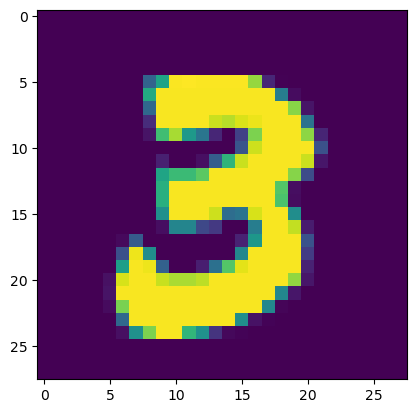

In [19]:
import matplotlib.pyplot as plt

plt.imshow(inputs[6,0])

#Calculate logit 
out = net(inputs[6,0].view(-1, 28*28))
print(out)
#Calculate probability 
print(torch.exp(out)/torch.exp(out).sum())
print(out.max(1))
print(labels[6])

tensor([[-3.9885, -4.1984,  2.4199, -3.6755, -0.2466, -1.7206,  8.0842, -3.4243,
         -1.4848, -3.4595]], grad_fn=<AddmmBackward0>)
tensor([[5.6917e-06, 4.6139e-06, 3.4544e-03, 7.7831e-06, 2.4007e-04, 5.4974e-05,
         9.9614e-01, 1.0006e-05, 6.9597e-05, 9.6596e-06]],
       grad_fn=<DivBackward0>)
torch.return_types.max(
values=tensor([8.0842], grad_fn=<MaxBackward0>),
indices=tensor([6]))
tensor(6)


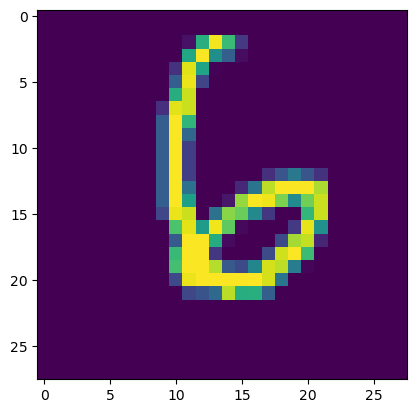

In [10]:
#Try another one

plt.imshow(inputs[8,0])
out = net(inputs[8,0].view(-1, 28*28))
print(out)
print(torch.exp(out)/torch.exp(out).sum())
print(out.max(1))
print(labels[8])

### Which digits failed to get identified accurately?

The test set accuracy of the network is: 95%. So find out which digits were not identified accurately.

In [11]:
correct, total = 0, 0
predictions = []

#Set neural network model (net) in eval mode
net.eval()

for i, data in enumerate(test_loader):
        inputs, labels = data
        
        #reading images into vectors
        inputs = inputs.view(-1, 28*28)
        
        outputs = net(inputs)
        _, outputs = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (outputs == labels).sum().item()
        if correct < total: #i is the minibatch size
            break

In [12]:
outputs == labels

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True])

In [13]:
(outputs != labels).nonzero()[0]

tensor([2])

### Is it 5 or 0?

tensor([[ 5.9977, -6.2086,  0.5503, -0.0855, -1.9357, -0.1284,  2.8294, -4.6517,
         -1.9323, -3.3326]], grad_fn=<AddmmBackward0>)
tensor([[9.5086e-01, 4.7532e-06, 4.0955e-03, 2.1686e-03, 3.4092e-04, 2.0777e-03,
         4.0007e-02, 2.2550e-05, 3.4209e-04, 8.4332e-05]],
       grad_fn=<DivBackward0>)
torch.return_types.max(
values=tensor([5.9977], grad_fn=<MaxBackward0>),
indices=tensor([0]))
tensor(5)


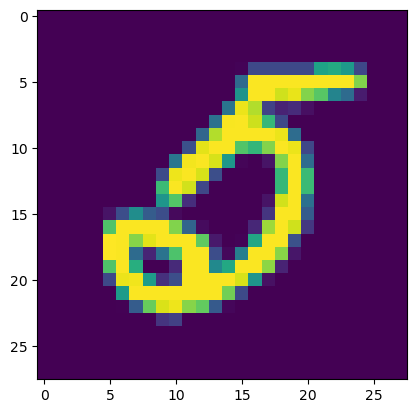

In [14]:
import matplotlib.pyplot as plt

index = (outputs != labels).nonzero()[0,0]
inputs, labels = data
plt.imshow(inputs[index,0])
out = net(inputs[index,0].view(-1, 28*28))
print(out)
print(torch.exp(out)/torch.exp(out).sum())
print(out.max(1)) #Highest value in the predicted out
print(labels[index]) #True label
 
#nn identified 0 but the true value is 5

Reference: 

DataCamp course: Deep Learning with PyTorch by Ismail Elezi, Hadrien Lacroix and Hillary Green-Lerman